# Исследование успешности игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## 1. Откроем файл и изучим общую информацию.

Для этого импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Сохраним данные в переменную df

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Узнаем общую информацию, характериски и выведем первые 10 строк

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В данных есть пропуски в некоторых столбцах. Так же есть необходимо изменить типы данных, скорректировать названия.

## 2. Подготовим данные

- **Заменим названия столбцов, приведём их к нижнему регистру.**

In [3]:
#Примаеним lower к колонкам

df.columns = df.columns.str.lower()

In [4]:
#Проверим

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- **Рассмотрим пропуски.**

In [6]:
pd.DataFrame(df.isna().mean()*100).style.set_precision(2).background_gradient('coolwarm')

C:\Users\GRKCH\AppData\Local\Temp\ipykernel_6500\3346166439.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame(df.isna().mean()*100).style.set_precision(2).background_gradient('coolwarm')


,0
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


Пропуски в столбце name удалим, их всего 2.

In [7]:
# КОД РЕВЬЮЕРА subset='name' --> subset=['name'] 
df.dropna(subset=['name'], inplace=True, axis=0)

In [8]:
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


Пропуски были в одинаковых строках, в столбах имени и жанра игры.

В столбце с датами тоже есть пропуски, их не очень много. Наше исследование сильно привязано к датам, поэтому думаю будет лучше удалить эти строки.

In [9]:
# КОД РЕВЬЮЕРА subset='year_of_release' --> subset=['year_of_release'] 

df.dropna(subset=['year_of_release'], inplace=True, axis=0)

Рассмотрим пропуски, связанные с продажами.

In [10]:
#Создадим новый столбец с суммой продаж

df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Найдём строки, где нет продаж и удалим их.

In [11]:
df.loc[df['sum_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [12]:
df.drop(index=[16676, 16709], axis=0, inplace=True)

Рассмотрим пропуски в столбцах **critic_score** и **user_score**.

In [13]:
df.loc[(df['critic_score'].isna()==True)&(df['user_score'].isna()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Эти пропуски сложно объяснить логически, вероятно, это ошибка при выгрузке данных. Так же возможно игры с маленьким числом продаж просто не были оценены.

Пропуски не сильно зависят от продаж, года выпуска и платформы. Заполним их несуществующим у нас значением, чтобы можно было без ограничений анализировать эти данные.

In [16]:
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

- **Рассмотрим значение 'tbd' в столбце рейтинга.**

In [14]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Это аббривеатура  означает, что у игры пока мало отзывов, чтобы можно было составить рейтинг.
Т.е в нашем случае это по сути пропуски.

Заполним их так же, как и пропуски.

In [18]:
df['user_score'] = df['user_score'].replace('tbd', 0)

Исправим пропуски в столбце rating.

In [19]:
df['rating'] = df['rating'].fillna('unknown')
unk = df.query('rating == "unknown"').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
print(unk.sort_values(by='na_sales'))

         eu_sales  jp_sales  na_sales
rating                               
unknown    609.65    836.74   1225.84


Проверим дубликаты в таблице.

In [20]:
#Найдем полные дубликаты по названию игры, платформе и году выпуска
df.loc[df[['name','platform','year_of_release']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [21]:
#Удалим 1 дубликат
df = df.drop(index=16230)

Снова выведем общую информацию.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  float64
 9   user_score       16441 non-null  object 
 10  rating           16441 non-null  object 
 11  sum_sales        16441 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Итого, мы полностью избавились от пропусков и дубликатов в таблице. Нулевые значения по столбцам нужно будет иметь ввиду, в дальнейшем анализе.

- **Преобразуем типы данных.**

Для удобства подсчетов изменим оценку пользователей на float и значение года выпуска изменим на тип даты.

In [23]:
df['user_score'] = df['user_score'].astype('float')

In [24]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

## Исследовательский анализ.

- **Посмотрим статистику по годам.**

Text(0, 0.5, 'Кол-во игр')

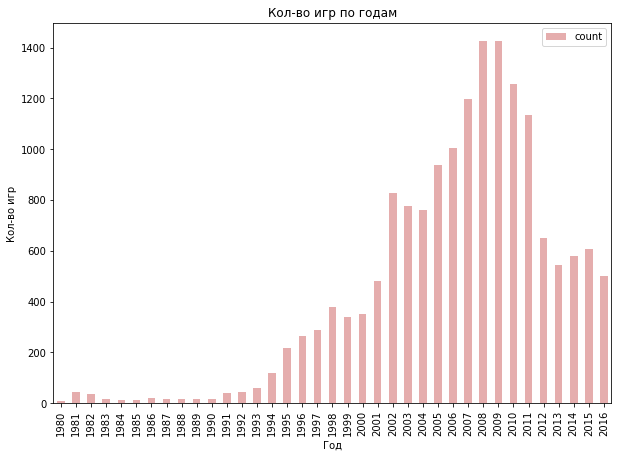

In [25]:
#Создадим переменную и добавим в неё сводную таблицу, в которой почситаем кол-во игр 

year_count = df.pivot_table(index='year_of_release',values='name', aggfunc='count')
year_count.columns = ['count']

#Выведем полученную гистограмму

year_count.plot(y='count',\
                kind='bar',\
               figsize=(10,7),\
               color='indianred',\
               alpha=0.5)
plt.title('Кол-во игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

Из гистограммы видно, что больше всего продано игр в 2008-2009 году. В целом до 2009 года был рост выпуска игр, затем вероятно достаточно развились мобильные устройства, поэтому популярность приставок упала.

- **Рассмотрим кол-во продаж по платформам.**

In [26]:
#Создадим переменную и добавим в неё сводную таблицу, в которой расчитаем сумму продаж.
count_sales = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
count_sales.columns =['sum']
count_sales.sort_values(by='sum', ascending=False)

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из таблицы выделяются первые 6 плаьформ. Построим по ним график.

Text(0, 0.5, 'Кол-во продаж')

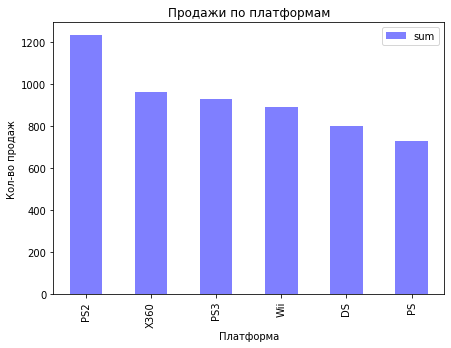

In [27]:
#Выделим топ 6 и построим гистограмму

count_sales = count_sales.sort_values(by='sum', ascending=False).head(6)
count_sales.plot(y='sum',\
      kind='bar',\
      figsize=(7,5),\
      color='blue',\
      alpha=0.5)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')

Наиболее популярные платформы это PS2, X360 и PS3, это все западные платформы. Так же в топ попали азиатские приставки Wii и DS.

Text(-3.825000000000003, 0.5, 'Платформа')

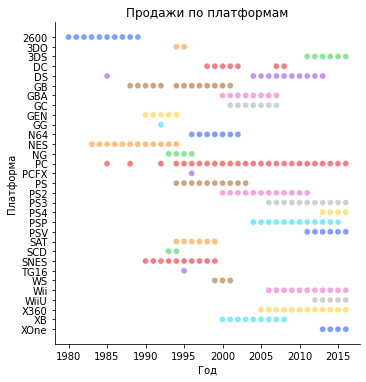

In [28]:
#Создадим переменную, которую сохраним сводную таблицу с суммой продаж и годами 
live_year = df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
live_year.columns=['sum']

#Построим точечный график
sns.relplot(data=live_year,\
            x='year_of_release',\
           y='platform',\
           alpha=0.5,\
           color='orange',\
           palette='bright',\
           kind='scatter',\
           hue='platform',\
           legend=False)
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Платформа')

По графику можно сказать, что в среднем платформа живёт 5-7 лет, затем их сменяют другие. Наиболее популярные живут дольше.

Данные за актуальный период выберем от 2014 до 2016 года.

- **Рассмотрим динамику продаж за актуальный период.**

Text(13.188888888888897, 0.5, 'Платформа')

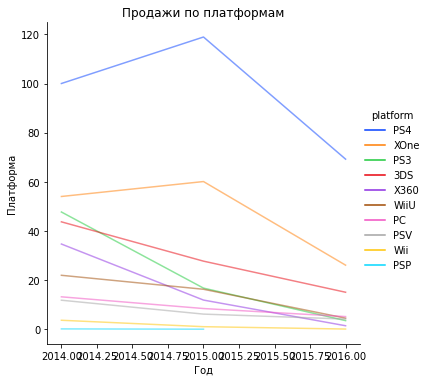

In [29]:
actual_df = df[df['year_of_release'] >= 2014]
top_sales = actual_df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False)


top_sales.columns =['sum']

sns.relplot(data=top_sales,\
            x='year_of_release',\
           y='sum',\
           alpha=0.5,\
           color='orange',\
           palette='bright',\
           kind='line',\
           hue='platform',\
           legend=True)
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Платформа')

Из графика видно, что продажи всех платформ падают к 2016 году. К 2016 году наиболее популярными оказались всего три платформы - PS4, XOne, 3DS. Их можно назвать самыми перспективными.  Из них PS4 и XOne относительно новые и у них был пик популярности в середине 2015 года.

- **Построим boxplot по глобальным продажам.**

(0.0, 1.75)

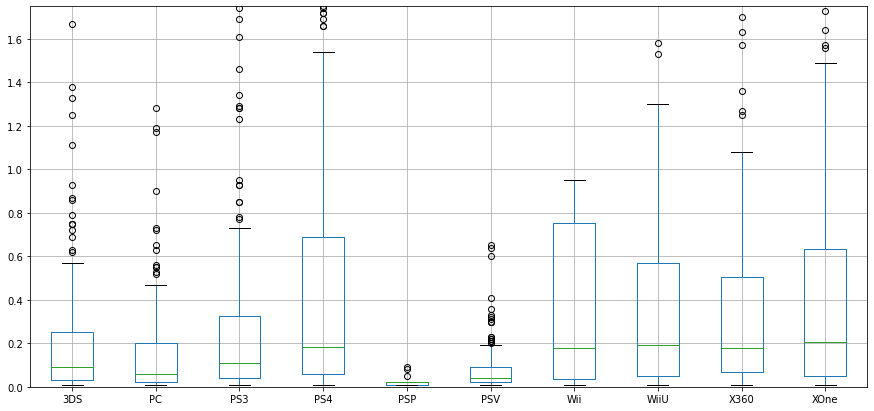

In [30]:
#Выберем данные за актуальный период и соответствующие платформы
top_platform = df[df['year_of_release'] >= 2014]['platform'].unique()

#Построим boxplot
fig,ax = plt.subplots(figsize=(15,7))
actual_df.query('platform in @top_platform')\
.pivot_table(index=['name'], values='sum_sales', columns='platform').boxplot(ax=ax, grid=True)

ax.set_ylim(0,1.75)

Медиана у платформ немного разнится. От 0.15 до 0.25 млн продаж. Максимальные же продажи у PS4 - 1.75 млн.

- **Рассмотрим влияние отзывов на продажи.**

Text(0, 0.5, 'Продажи')

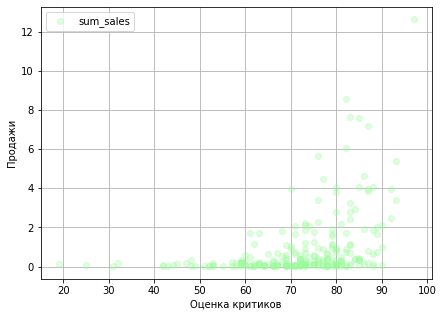

In [31]:
#Сохраним в переменную сводную таблицу с суммой оценок и продаж. Так же уберем нулевые значения, т.к. это были пропуски
score = actual_df.query('platform == "PS4" and critic_score != 0  and user_score != 0')\
.pivot_table(index=['name'], values=['critic_score', 'user_score', 'sum_sales'], aggfunc='sum')


#Построим точечный график

score.plot(x='critic_score',\
          y='sum_sales',\
          style= 'o',\
          grid=True,\
          figsize = (7,5),\
          alpha=0.3,\
          color='palegreen')

plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')

По графику можно сказать, что продажи в целом зависят от оценки критиков. Чем выше оценки, тем больше продажи.
Рассмотрим влияние отзывов пользователей.

Text(0, 0.5, 'Продажи')

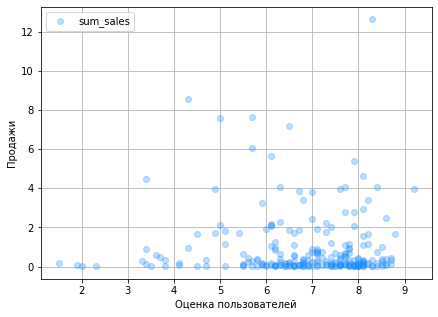

In [32]:
score.plot(x='user_score',\
          y='sum_sales',\
          style= 'o',\
          grid=True,\
          figsize = (7,5),\
          alpha=0.3,\
          color='dodgerblue')

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')

Оценки пользователее заметно менее влияют на продажи. Рассмотрим корреляцию.

In [33]:
print(score['user_score'].corr(score['sum_sales']))
print(score['critic_score'].corr(score['sum_sales']))

-0.04318585997193629
0.40190287811475306


По корреляции действительно видно, что оценки критиков сильнее вляют на продажи игры, а у оценок пользователей вообще отрицательная корреляция. Однако корреляция всё же незначительна. Думаю оценки не так сильно вляют на продажи, т.к. появляются уже после продажи игры.

- **Рассмотрим отзывы на других популярных платформах.**

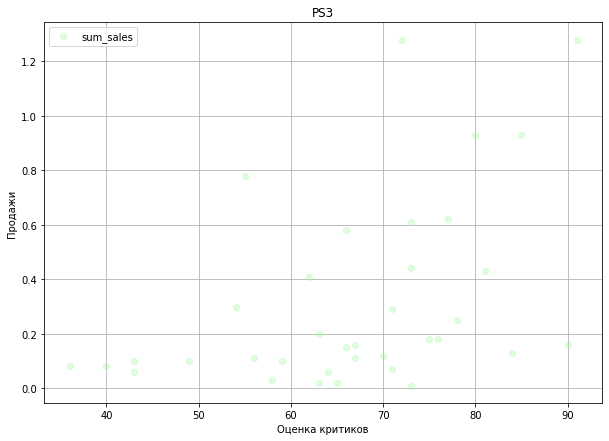

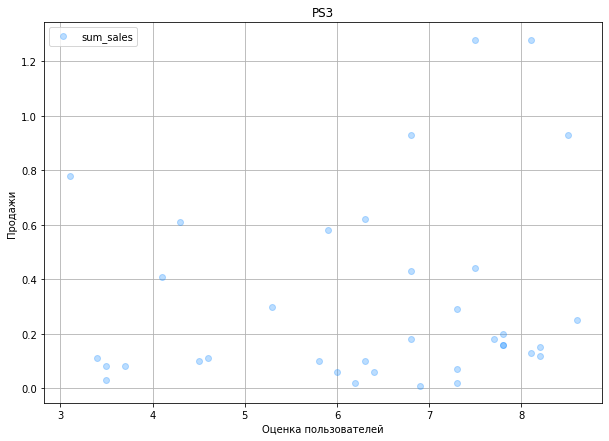

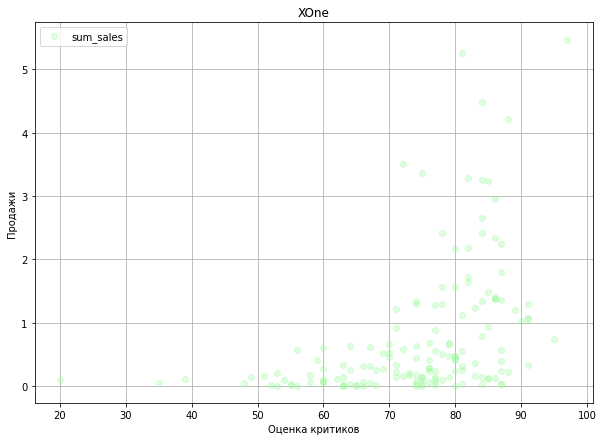

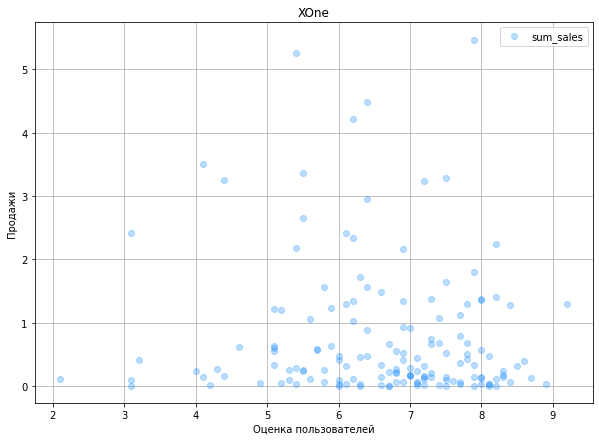

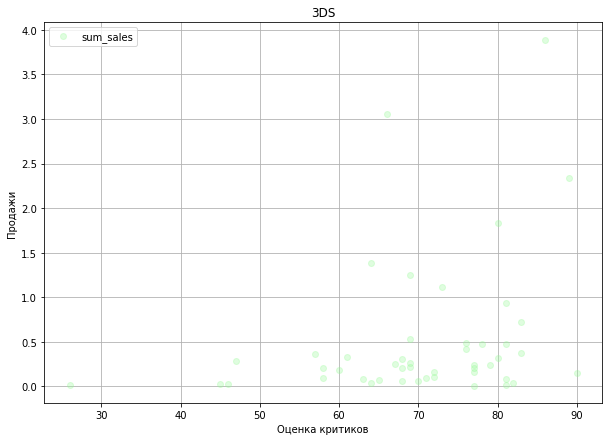

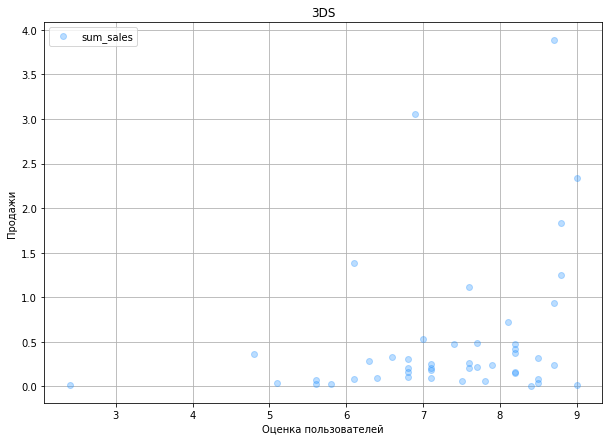

In [34]:
#Напишем цикл, который будет принимать название платформы и строить графики по ней
top_platforms = ['PS3','XOne','3DS']

for i in top_platforms:
    score = actual_df.query('platform == @i and critic_score != 0  and user_score != 0')\
.pivot_table(index=['name'], values=['critic_score', 'user_score', 'sum_sales'], aggfunc='sum')


#Построим точечный график по оценакам критиков

    score.plot(x='critic_score',\
          y='sum_sales',\
          style= 'o',\
          grid=True,\
          figsize = (10,7),\
          alpha=0.3,\
          color='palegreen',\
          legend=True)
    plt.title(i)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    
#И по оценкам пользователей

    score.plot(x='user_score',\
          y='sum_sales',\
          style= 'o',\
          grid=True,\
          figsize = (10,7),\
          alpha=0.3,\
          color='dodgerblue',\
          legend=True)
    plt.title(i)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    

По другим платформам зависимость повторяется. Значительнее зависимость от оценок критиков и почти не влияет оценка пользователей. Но опять же у всех корреляция очень низкая.

- **Рассмотрим распределение по жанрам.**

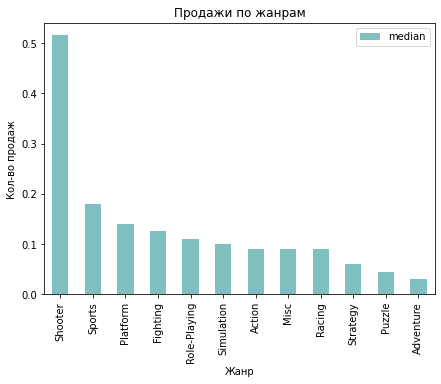

In [35]:
#Создадим переменную со сводной таблицей по жанрам

genre_top = actual_df.pivot_table(index='genre', values='sum_sales', aggfunc=['median'])
genre_top.columns = ['median']
#Выведем гистограмму с кол-вом продаж и суммой продаж

genre_top.sort_values(by='median', ascending=False).plot(y=['median'],\
      kind='bar',\
      figsize=(7,5),\
      color=['teal'],\
      alpha=0.5)
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во продаж')
plt.legend()

Наиболее продаваемые оказались жанры Shooter, Sports, Platform (это игры по типы СуперМарио).Разница медиане продаж жанра Shooter и остальных очень большая, все игры больше чем в два раза меньше.
Наименее продаваемыми оказались Puzzle, Strategy, что не удивительно, это сложные игры.

## Составим портрет пользователя каждого региона.

- **Рассмотрим популярные платформы и жанры в каждом регионе.**

Построим графики по продажам и жанру пользователей Северной Америки.

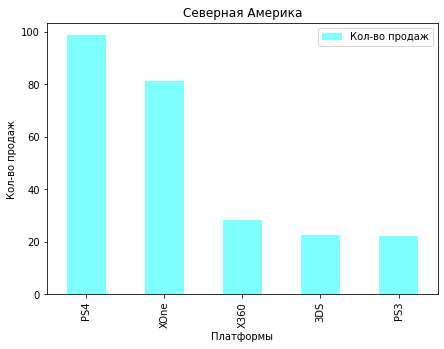

In [36]:
#Составим сводную таблицу и выберем из неё топ 5 платформ
na_user = actual_df.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])
na_user.columns = ['sum']

na_user = na_user.sort_values(by='sum', ascending=False).head(5)

na_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='cyan',\
      alpha=0.5)
plt.title('Северная Америка')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.legend(['Кол-во продаж'])

Из графика видно, что самые популярные платформы в Северной Америке PS4, XOne, X360.

Посмотрим на жанры:

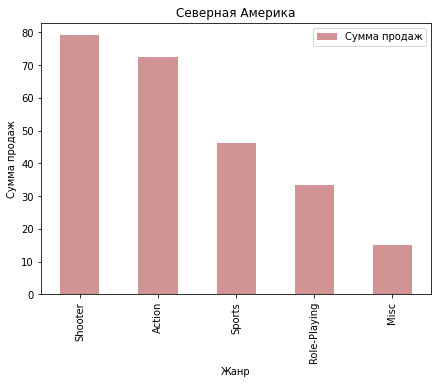

In [37]:
#Составим сводную таблицу и выведем топ 5 жанров 
na_user = actual_df.pivot_table(index='genre', values='na_sales', aggfunc=['sum'])
na_user.columns = ['sum']

na_user = na_user.sort_values(by='sum', ascending=False).head(5)

na_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='brown',\
      alpha=0.5)
plt.title('Северная Америка')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.legend(['Сумма продаж'])

А самые популярные жанры Shooter, Actions, Sports.

Пользователи Северной америки чаще всего имеют приставку PS4  и играют в жанры Action и Sports.

- Рассмотрим пользователей Европы.

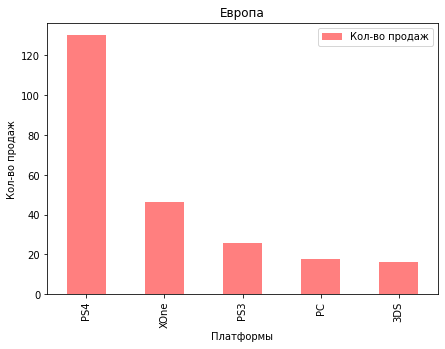

In [38]:
#Составим сводную таблицу и график по топ 5 платформам
eu_user = actual_df.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])
eu_user.columns = ['sum']

eu_user = eu_user.sort_values(by='sum', ascending=False).head(5)

eu_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='red',\
      alpha=0.5)
plt.title('Европа')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.legend(['Кол-во продаж'])

Как видно в топе все те же платформы, наиболее популярной стала PS4 и XOne. Продажи по самой популярной патформе отличаются почти в два раза, в Европе реже покупают приставки (320 млн. в Европе против 590 млн. в Северной Америке).

Посмотрим на жанры:

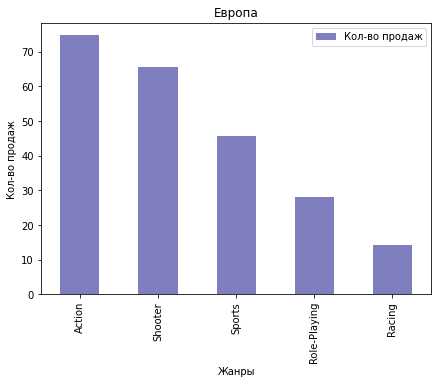

In [39]:
#Построим сводную таблицу по жанрам и выведем график по топ 5
eu_user = actual_df.pivot_table(index='genre', values='eu_sales', aggfunc=['sum'])
eu_user.columns = ['sum']

eu_user = eu_user.sort_values(by='sum', ascending=False).head(5)

eu_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='navy',\
      alpha=0.5)
plt.title('Европа')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.legend(['Кол-во продаж'])

Жанры в Европе распределились так же, как в Северной Америке, за исключением последнего, в Европе это Racing. Но вот продажи так же значительно отличаются по всем жанрам, в пользу Северной Америки. Так же повился жанр Role-Playing.

Как итог пользователи в Европе и Северной Америке очень схожи. Самая популярная платформа PS4, жанры так же похожи Shooter, Actions, Sports.

- Рассмотрим пользователей Японии.

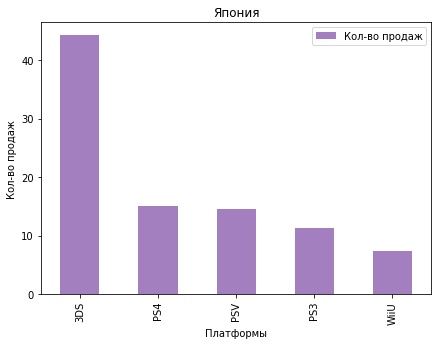

In [40]:
#Составим сводную таблицу по платформам и выведем график топ 5
jp_user = actual_df.pivot_table(index='platform', values='jp_sales', aggfunc=['sum'])
jp_user.columns = ['sum']

jp_user = jp_user.sort_values(by='sum', ascending=False).head(5)

jp_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='indigo',\
      alpha=0.5)
plt.title('Япония')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.legend(['Кол-во продаж'])

Продажи в Японии значительно ниже и среди Американских платформ тут только PS4 и PS3, остальные локальные. Продажи самой популярной платформы составили в 4 раза меньше, чем в Северной Америке. Это объясняется тем, что в Японии живет намного меньше людей и более консервативное общество. Самыми популярными платформами в Японии стали 3DS, PS4, PSV.

Рассмотрим жанры:

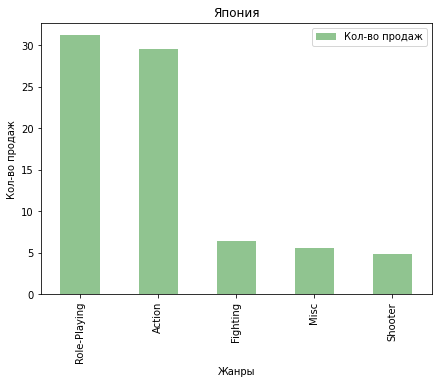

In [41]:
#Составим сводную таблицу по жанрам и график с топ 5 
jp_user = actual_df.pivot_table(index='genre', values='jp_sales', aggfunc=['sum'])
jp_user.columns = ['sum']

jp_user = jp_user.sort_values(by='sum', ascending=False).head(5)

jp_user.plot(y=['sum'],\
      kind='bar',\
      figsize=(7,5),\
      color='forestgreen',\
      alpha=0.5)
plt.title('Япония')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.legend(['Кол-во продаж'])

Самыми популярными жанрами оказались другие - Role-Playing и Action. Но продажи так же в разы меньше.
Пользователи в Японии чаще всего имеют приставку 3DS и играют в жанр Role-Playing.

- **Узнаем влияние рейтинга ESRB на продажи в разных регионах.**

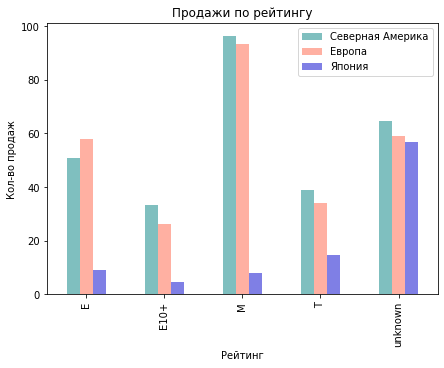

In [42]:
rating_region = actual_df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

rating_region = rating_region[['na_sales', 'eu_sales', 'jp_sales']]

rating_region.plot(y=['na_sales', 'eu_sales', 'jp_sales'],\
      kind='bar',\
      figsize=(7,5),\
      color=['teal','tomato','mediumblue'],\
      alpha=0.5)
plt.title('Продажи по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж')
plt.legend(['Северная Америка','Европа','Япония'])

На первом месте оказался рейтинг M-для взрослых, старше 17 лет. На втором месте неизвестный рейтинг, он примерно одинков во всех регионах, поэтому сложно сказать, что в каком-то конктретном регионе он не присваивается. Возможно на это влияют общие продажи, т.к их в Северной Америке их значительно больше. И на третьем месте оказались игры с рейтингом E - для всех.

Построим график по медианным значениям продаж.

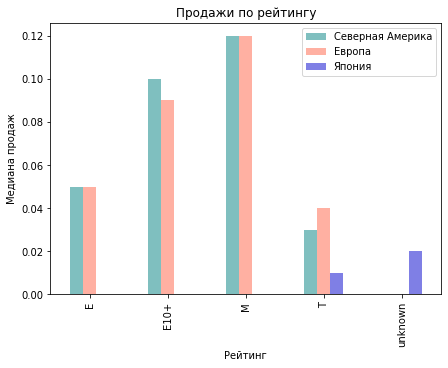

In [43]:
rating_region = actual_df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')

rating_region = rating_region[['na_sales', 'eu_sales', 'jp_sales']]

rating_region.plot(y=['na_sales', 'eu_sales', 'jp_sales'],\
      kind='bar',\
      figsize=(7,5),\
      color=['teal','tomato','mediumblue'],\
      alpha=0.5)
plt.title('Продажи по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Медиана продаж')
plt.legend(['Северная Америка','Европа','Япония'])

Действительно по медиане видно, что наибольшие продажи у неизвестного рейтинга в Японии. И минимальные медианы по другим рейтингам, их даже не видно на графике. Вероятно действительно, рейтинг расчитывается только для Европы и Северной Америки. Исходя из данных в интернете, у Японии свой рейтинг игр - CERO и им незачем поолучать оценку Американского агенства, если это игры нацеленные на локальный рынок.

## Сформулируем и проверим гепотизы

Первая:
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Н0 - средние пользовательские рейтинги  Xbox One = рейтингам PC .                                                      

Н1 - средние пользовательские рейтинги  Xbox One != рейтингам PC.

In [44]:
#Создадим переменные с данными рейтинга по платформам
xbox_one = actual_df[(actual_df['platform'] == 'XOne') & (actual_df['user_score'] > 0)]['user_score']
pc = actual_df[(actual_df['platform'] == 'PC') & (actual_df['user_score'] > 0)]['user_score']

#Установим погоровое значение 05
alpha = .05
results = st.ttest_ind(xbox_one, pc, equal_var = False)

print('p-значение:', results.pvalue)

#Выведем результат при условии
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Нулевая гепотиза не верна. Значит у нас нет оснований утверждать, что рейтинги платформ одтнковые.

Вторая: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Н0 - средние пользовательские рейтинги жанра Action != жанру Sports.

Н1 - средние пользовательские рейтинги жанра Action = жанру Sports.

In [45]:
#Создадим переменные с данными рейтинга по жанрам
action = actual_df[(actual_df['genre'] == 'Action') & (actual_df['user_score'] > 0)]['user_score']
sports = actual_df[(actual_df['genre'] == 'Sports') & (actual_df['user_score'] > 0)]['user_score']

#Установим погоровое значение 05
alpha = .05
results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

#Выведем результат при условии
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Результат означает, что у нас нет оснований утверждать, что рейтинги жанров разные.

# Общий вывод

- Мы провели предобработку данных. По максимуму избавились от пропусков, заполнили их. Выянили значение tbd - по сути это пропуски. 

- Выяснили, что активно начали появляться игры лишь в 2000-ных годах. Так же самыми популярными платформами за все время стали PS2, X360 и PS3, это все западные платформы. Так же в топ попала азиатска приставка Wii. Узнали, что в среднем платформы живут 5-7 лет, а затем их сменяют новые.

- Мы взяли данные за актуальный период с 2014 по 2016 года и в дальнейшем анализировали их. Это поможет нам составить прогноз на 2017 год. Построив графики, мы узнали, что все платформы к 2016 году приходят в упадок, вероятно это связано с активным развитием мобильного гейминга. Но все же можно выделить несколько перспективных платформ - PS4, XOne, 3DS. 

- В дальнейшем рассмотрели влияние отзывов критиков и пользователей на продажи по платформам. Выяснилось, что корреляция между отзывами и продажами крайне маленькая, однако отзывы критиков влияют значительнее, это возможно связано с тем, что пользователи оставляют отзывы уже после покупки игры.

- Наиболее прибыльными оказались жанры Action, Sports, Shooter, Role-Playing. При этом сумма продаж у жанра Action в два раза меньше чем кол-во продаж, в отличие от Sports. Вероятно игры второго жанра стоят дороже. Интересно, что в жанре Shooter кол-во продаж почти равняется, это самые дорогие игры из всех.

- Мы составили портреты пользователей из разных регионов. Пользователи Северной Америки и Европы оказались очень похожи. У них чаще всего приставка PS4. И играют они в жанры Action и Sports. В Японии же все наоборот. Чаще всего они имеют приставку 3DS  и играют в жанр Role-Playing (с очень большим отрывом от других жанров).

- Так же мы проверили две гепотизы :
1. У нас нет оснований утверждать, что рейтинги платформ Xbox One и PC одинковые.
2. У нас нет оснований утверждать, что рейтинги жанров Action и Sports разные.

- Ну и мы выяснили, что рейтинг игр тоже влияет на продажи, наиболее прибыльно создавать игры с рейтингом "Для всех". И рейтинг для Японии совсем другой.

Итого:
Самые пероспективные платформы это PS4 и XOne, самые перспективные жанры action и sports, а самый перспективный рынок это Северная Америка.